In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the simulator class for M/M/1 and M/M/2 queues
class MMQueueSimulator:
    def __init__(self, arrival_rate, service_rate, servers, total_customers=10000):
        """
        Initialize the queue simulator with given parameters.

        :param arrival_rate: Arrival rate (λ)
        :param service_rate: Service rate (µ)
        :param servers: Number of servers (k)
        :param total_customers: Total number of customers to simulate
        """
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.servers = servers
        self.total_customers = total_customers

    def run_simulation(self):
        """
        Run the queue simulation and return key performance metrics.

        :return: Dictionary containing average queue length, response time, utilization, and queue lengths.
        """
        # Generate exponential interarrival and service times
        np.random.seed(42)  # Fix random seed for reproducibility
        interarrival_times = np.random.exponential(1 / self.arrival_rate, self.total_customers)
        service_times = np.random.exponential(1 / self.service_rate, self.total_customers)

        # Compute arrival times as cumulative sum of interarrival times
        arrival_times = np.cumsum(interarrival_times)

        # Track departure times for each server and other metrics
        departure_times = [0] * self.servers  # Server availability times
        queue_length = 0  # Current queue length
        queue_lengths = []  # Record of queue lengths over time
        response_times = []  # Record of response times for each customer

        # Simulate each customer
        for i in range(self.total_customers):
            arrival = arrival_times[i]  # Arrival time of the current customer
            service = service_times[i]  # Service time of the current customer

            # Find the earliest available server
            next_free_server = np.argmin(departure_times)
            next_free_time = departure_times[next_free_server]

            if arrival < next_free_time:
                # If all servers are busy, the customer must wait
                queue_length += 1
                start_service_time = next_free_time
            else:
                # If a server is free, the customer is served immediately
                start_service_time = arrival

            # Calculate departure time and update server's availability
            departure_time = start_service_time + service
            departure_times[next_free_server] = departure_time

            # Record response time and queue length
            response_time = departure_time - arrival
            queue_lengths.append(queue_length)
            response_times.append(response_time)

            # Reduce queue length as service is completed
            if arrival < next_free_time:
                queue_length -= 1

        # Calculate metrics
        return {
            "average_queue_length": np.mean(queue_lengths),  # Average number in the queue
            "average_response_time": np.mean(response_times),  # Average total time in the system
            "server_utilization": self.arrival_rate / (self.servers * self.service_rate),  # Fraction of time servers are busy
            "queue_lengths": queue_lengths,  # Queue lengths at different times
        }

In [3]:
def run_mm1_mm2_simulations():
    """
    Run simulations for both M/M/1 and M/M/2 queues under different scenarios.

    :return: List of simulation results for each scenario.
    """
    results = []

    # Define test scenarios
    scenarios = [
        {"arrival_rate": 0.5, "service_rate": 1.0, "servers": 1, "name": "M/M/1 (ρ=0.5)"},
        {"arrival_rate": 0.7, "service_rate": 1.0, "servers": 1, "name": "M/M/1 (ρ=0.7)"},
        {"arrival_rate": 0.9, "service_rate": 1.0, "servers": 1, "name": "M/M/1 (ρ=0.9)"},
        {"arrival_rate": 1.8, "service_rate": 1.0, "servers": 2, "name": "M/M/2 (ρ=0.9)"},
    ]

    # Run simulation for each scenario
    for scenario in scenarios:
        simulator = MMQueueSimulator(
            arrival_rate=scenario["arrival_rate"],
            service_rate=scenario["service_rate"],
            servers=scenario["servers"],
        )
        result = simulator.run_simulation()
        results.append({**scenario, **result})

    return results


In [4]:
def plot_results(results):
    """
    Generate plots for queue length distribution and theoretical vs. simulated comparisons.

    :param results: List of simulation results.
    """
    # Plot histogram of queue lengths
    for result in results:
        plt.hist(result["queue_lengths"], bins=20, alpha=0.6, label=result["name"])
    plt.title("Queue Length Distribution")
    plt.xlabel("Queue Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Compare theoretical vs simulated queue lengths
    for result in results:
        plt.hist(
            result["queue_lengths"], bins=10, alpha=0.6, label=f"Simulated ({result['name']})", density=True
        )
    plt.title("Theoretical vs Simulated Queue Length Distribution")
    plt.xlabel("Queue Length")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

        Scenario  Average Queue Length  Average Response Time  \
0  M/M/1 (ρ=0.5)                0.5144               2.075065   
1  M/M/1 (ρ=0.7)                0.7246               3.798191   
2  M/M/1 (ρ=0.9)                0.9342              16.451813   
3  M/M/2 (ρ=0.9)                0.9005               8.469080   

   Server Utilization  
0                 0.5  
1                 0.7  
2                 0.9  
3                 0.9  


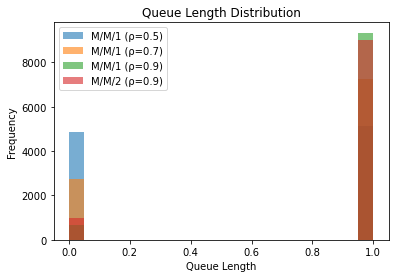

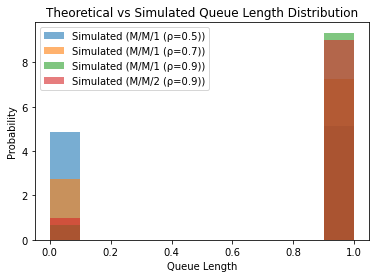

In [5]:
# Main execution
if __name__ == "__main__":
    # Run simulations
    results = run_mm1_mm2_simulations()

    # Display results in tabular format
    import pandas as pd
    results_df = pd.DataFrame(results)[
        ["name", "average_queue_length", "average_response_time", "server_utilization"]
    ]
    results_df.columns = [
        "Scenario",
        "Average Queue Length",
        "Average Response Time",
        "Server Utilization",
    ]
    print(results_df)

    # Plot results
    plot_results(results)
